In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# Lendo arquivo .csv dos microdados disponível em: https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem e em seguida verifiquei o dataframe e quantidade de linhas e colunas.
base = pd.read_csv('/content/drive/MyDrive/Dados/MICRODADOS_ENEM_2022.csv', sep= ';', encoding='iso-8859-1')
display(base.head(5))
print(base.shape)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210057943671,2022,14,M,2,2,1,1,2,1,...,B,A,A,A,A,A,A,A,A,A
1,210057516120,2022,14,M,2,1,1,1,16,1,...,E,E,B,E,B,B,E,B,E,B
2,210057280536,2022,5,F,1,2,1,1,2,1,...,A,A,A,A,A,A,C,A,A,B
3,210055724397,2022,6,M,1,3,1,1,2,1,...,B,A,A,C,A,A,C,B,B,B
4,210055097896,2022,4,M,0,3,1,1,1,1,...,A,A,A,A,A,A,B,A,A,A


(3476105, 76)


In [ ]:
# Verifiquei todas as colunas do dataframe para separar as colunas que me interessam para a análise.
base.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC',
       'CO_UF_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'CO_MUNICIPIO_PROVA',
       'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'SG_UF_PROVA',
       'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH',
       'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 'TP_LINGUA',
       'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC',
       'TX_GABARITO_MT', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1',
       'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', '

In [ ]:
# Separando as colunas para análise em uma variável chamada de 'baseReduzida', trazendo especialmente a coluna Q006 ('renda mensal familiar') e coluna Q025('possui Acesso a internet').
colunasSelecionadas = ['TP_FAIXA_ETARIA', 'TP_SEXO', 'TP_COR_RACA', 'TP_NACIONALIDADE',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA','NO_MUNICIPIO_PROVA',
       'IN_TREINEIRO', 'SG_UF_ESC','SG_UF_PROVA','NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT','NU_NOTA_REDACAO','Q006','Q025']

In [ ]:
# Filtrando o dataframe apenas com as colunas interessadas.
baseReduzidaEnem = base.filter(items = colunasSelecionadas)

In [ ]:
# Verificando o Filtro no novo dataframe 'baseReduzidaEnem' para manipulação mais rápida dos dados com 17 colunas.
display(baseReduzidaEnem.head(5))
print(baseReduzidaEnem.shape)

,TP_FAIXA_ETARIA,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,NO_MUNICIPIO_PROVA,IN_TREINEIRO,SG_UF_ESC,SG_UF_PROVA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q006,Q025
0,14,M,2,1,1,2,1,Brasília,0,NaN,DF,NaN,NaN,NaN,NaN,NaN,B,A
1,14,M,1,1,1,16,1,Brasília,0,NaN,DF,NaN,NaN,NaN,NaN,NaN,Q,B
2,5,F,2,1,1,2,1,Presidente Tancredo Neves,0,NaN,BA,421.1,546.0,498.8,565.3,760.0,B,B
3,6,M,3,1,1,2,1,Cariacica,0,NaN,ES,490.7,388.6,357.8,416.0,320.0,A,B
4,4,M,3,1,1,1,1,Salinópolis,0,NaN,PA,NaN,NaN,NaN,NaN,NaN,B,A


(3476105, 18)


In [ ]:
# Descobrindo a quantidade de candidatos por estado no dataframe por ordem alfabética
baseReduzidaEnem['SG_UF_PROVA'].value_counts()

SG_UF_PROVA
SP    544442
MG    309781
BA    265166
RJ    250890
CE    226377
PA    202621
PE    189595
RS    152295
PR    150396
GO    141622
MA    132916
PB    103238
RN     88049
PI     84400
SC     82791
AM     80986
DF     65401
AL     63945
ES     63700
MT     59381
SE     58312
MS     44683
RO     31969
TO     29440
AP     22674
AC     22601
RR      8434
Name: count, dtype: int64

In [ ]:
# Descobrindo a faixa etária dos candidatos
faixaEtaria = baseReduzidaEnem['TP_FAIXA_ETARIA'].value_counts().sort_index()
faixaEtaria

TP_FAIXA_ETARIA
1     303605
2     711278
3     805862
4     408115
5     247679
6     165982
7     123260
8      94849
9      73338
10     61564
11    189700
12    103634
13     74162
14     49735
15     30066
16     17688
17      9688
18      3817
19      1505
20       578
Name: count, dtype: int64

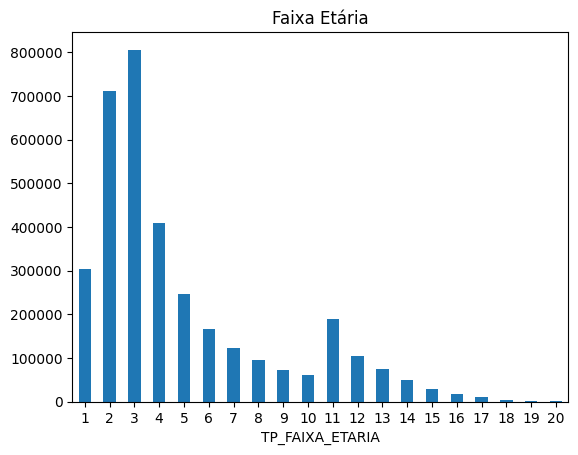

In [ ]:
# Vizualizando a faixa etária dos candidatos
faixaEtaria.plot(stacked= True, kind = 'bar', title= 'Faixa Etária')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Desobrindo a distribuição de candidatos por estado
baseEstado = baseReduzidaEnem['SG_UF_PROVA'].value_counts()
baseEstado

SG_UF_PROVA
SP    544442
MG    309781
BA    265166
RJ    250890
CE    226377
PA    202621
PE    189595
RS    152295
PR    150396
GO    141622
MA    132916
PB    103238
RN     88049
PI     84400
SC     82791
AM     80986
DF     65401
AL     63945
ES     63700
MT     59381
SE     58312
MS     44683
RO     31969
TO     29440
AP     22674
AC     22601
RR      8434
Name: count, dtype: int64

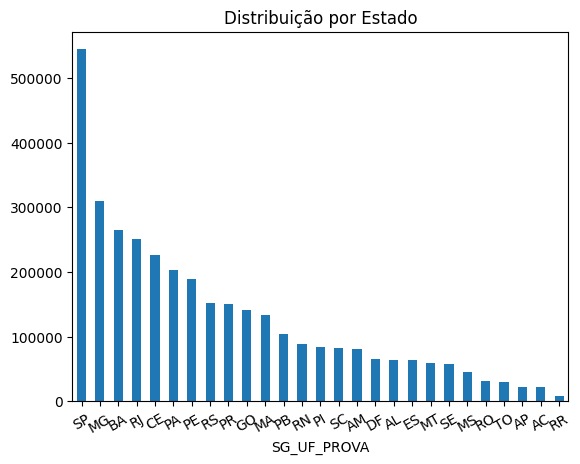

In [ ]:
#Vizualizando os dados de provas por estado, configurei o eixo X para ter uma rotaçao de 30º para uma melhor compreesão da vizualização do gráfico
baseEstado.plot(stacked= True, kind= 'bar',title= 'Distribuição por Estado')
plt.xticks(rotation= 30)
plt.show()

In [ ]:
# Analisando apenas candidatos do Estado do Ceará
baseCeara = baseReduzidaEnem[baseReduzidaEnem['SG_UF_PROVA'] == 'CE']
baseCeara.head()

,TP_FAIXA_ETARIA,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,NO_MUNICIPIO_PROVA,IN_TREINEIRO,SG_UF_ESC,SG_UF_PROVA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q006,Q025
23,4,M,3,1,1,1,1,Fortaleza,0,NaN,CE,476.0,559.2,607.3,625.4,760.0,E,B
40,5,F,3,1,2,0,2,Aracati,0,CE,CE,436.7,420.0,512.6,430.4,560.0,B,B
60,2,F,3,1,3,0,1,Fortaleza,1,NaN,CE,458.9,462.8,458.9,506.2,660.0,E,B
93,4,F,3,1,1,1,1,Aracati,0,NaN,CE,471.2,560.8,557.8,582.4,660.0,D,B
105,9,F,3,2,1,6,1,Fortaleza,0,NaN,CE,399.7,479.3,511.2,398.9,360.0,B,A


In [ ]:
# Analisando Faixa etária de candidatos no estado do Ceará.
faixaEtariaCeara = baseCeara['TP_FAIXA_ETARIA'].value_counts().sort_index()
faixaEtariaCeara

TP_FAIXA_ETARIA
1     19858
2     51400
3     61138
4     27481
5     15254
6      9071
7      6401
8      4807
9      3644
10     3180
11     9884
12     5303
13     3765
14     2346
15     1342
16      786
17      462
18      166
19       59
20       30
Name: count, dtype: int64

In [ ]:
# Calcular porcetagem de candidatos treineiros no estado do Ceará
baseTreineiro = baseCeara['IN_TREINEIRO'].value_counts()
porcentagemTreineiro = [100 * x/baseTreineiro.sum() for x in baseTreineiro]
porcentagemTreineiro

[86.16246350115074, 13.837536498849264]

In [ ]:
# Eliminando colunas com notas em branco
baseCeara.dropna(subset= ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO'], inplace= True)

<ipython-input-55-5cea8b1b3d60>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  baseCeara.dropna(subset= ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO'], inplace= True)


In [ ]:
# Criando uma nova coluna 'NOTA_GERAL' com média das notas para obtenção de desempenho.
baseCeara['NOTA_GERAL'] = baseCeara[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO']].mean(axis=1)
baseCeara.head()

<ipython-input-62-058e11812750>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  baseCeara['NOTA_GERAL'] = baseCeara[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO']].mean(axis=1)


,TP_FAIXA_ETARIA,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,NO_MUNICIPIO_PROVA,IN_TREINEIRO,SG_UF_ESC,SG_UF_PROVA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q006,Q025,NOTA_GERAL
23,4,M,3,1,1,1,1,Fortaleza,0,NaN,CE,476.0,559.2,607.3,625.4,760.0,E,B,605.58
40,5,F,3,1,2,0,2,Aracati,0,CE,CE,436.7,420.0,512.6,430.4,560.0,B,B,471.94
60,2,F,3,1,3,0,1,Fortaleza,1,NaN,CE,458.9,462.8,458.9,506.2,660.0,E,B,509.36
93,4,F,3,1,1,1,1,Aracati,0,NaN,CE,471.2,560.8,557.8,582.4,660.0,D,B,566.44
105,9,F,3,2,1,6,1,Fortaleza,0,NaN,CE,399.7,479.3,511.2,398.9,360.0,B,A,429.82


In [ ]:
#verificando registros nulos na coluna SG_UF_ESC. Conclusão de existem mais de 85mil registros sem localização de municipio de prova.
baseCeara['SG_UF_ESC'].isnull().sum()

85425